In [17]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Reading the raw dataframe
raw_df = pd.read_csv('../data/raw/raw_data.csv', index_col=0)
raw_df

,id,type,created_at,actor_id,repo_id
2686242,27800976126,PushEvent,2023-03-17 15:48:56+00:00,22228242,611467030
1211067,27789781112,CreateEvent,2023-03-17 07:56:58+00:00,102370036,615217758
1086939,27788983122,PushEvent,2023-03-17 07:09:50+00:00,38267385,614695987
2239755,27797139238,CreateEvent,2023-03-17 13:22:38+00:00,7535220,615338012
1150057,27789367456,ReleaseEvent,2023-03-17 07:33:14+00:00,103245157,614706094
...,...,...,...,...,...
3554498,27806725939,ForkEvent,2023-03-17 20:43:27+00:00,79039664,38565895
2088178,27796068568,PushEvent,2023-03-17 12:39:03+00:00,108808668,542552366
1700153,27793386330,PushEvent,2023-03-17 10:36:38+00:00,111567108,558863675
748250,27787057297,CreateEvent,2023-03-17 04:54:22+00:00,125986584,615164641


In [19]:
# Filter the data to remove the bot activities
raw_df['count'] = raw_df.groupby('actor_id')['actor_id'].transform('count')
filtered_df = raw_df.query("count >= 1 & count <= 30")
filtered_df = filtered_df.drop('count', axis=1)
filtered_df

,id,type,created_at,actor_id,repo_id
1211067,27789781112,CreateEvent,2023-03-17 07:56:58+00:00,102370036,615217758
1086939,27788983122,PushEvent,2023-03-17 07:09:50+00:00,38267385,614695987
2239755,27797139238,CreateEvent,2023-03-17 13:22:38+00:00,7535220,615338012
1150057,27789367456,ReleaseEvent,2023-03-17 07:33:14+00:00,103245157,614706094
3208550,27804617278,CreateEvent,2023-03-17 18:39:33+00:00,40711250,615459096
...,...,...,...,...,...
3656990,27807300998,PushEvent,2023-03-17 21:21:15+00:00,18726451,608884302
3554498,27806725939,ForkEvent,2023-03-17 20:43:27+00:00,79039664,38565895
2088178,27796068568,PushEvent,2023-03-17 12:39:03+00:00,108808668,542552366
748250,27787057297,CreateEvent,2023-03-17 04:54:22+00:00,125986584,615164641


In [20]:
# Pivot the data to the count of event for clustering
pivot_df = pd.pivot_table(filtered_df, values='id', index='actor_id', columns='type', aggfunc=len, fill_value=0)

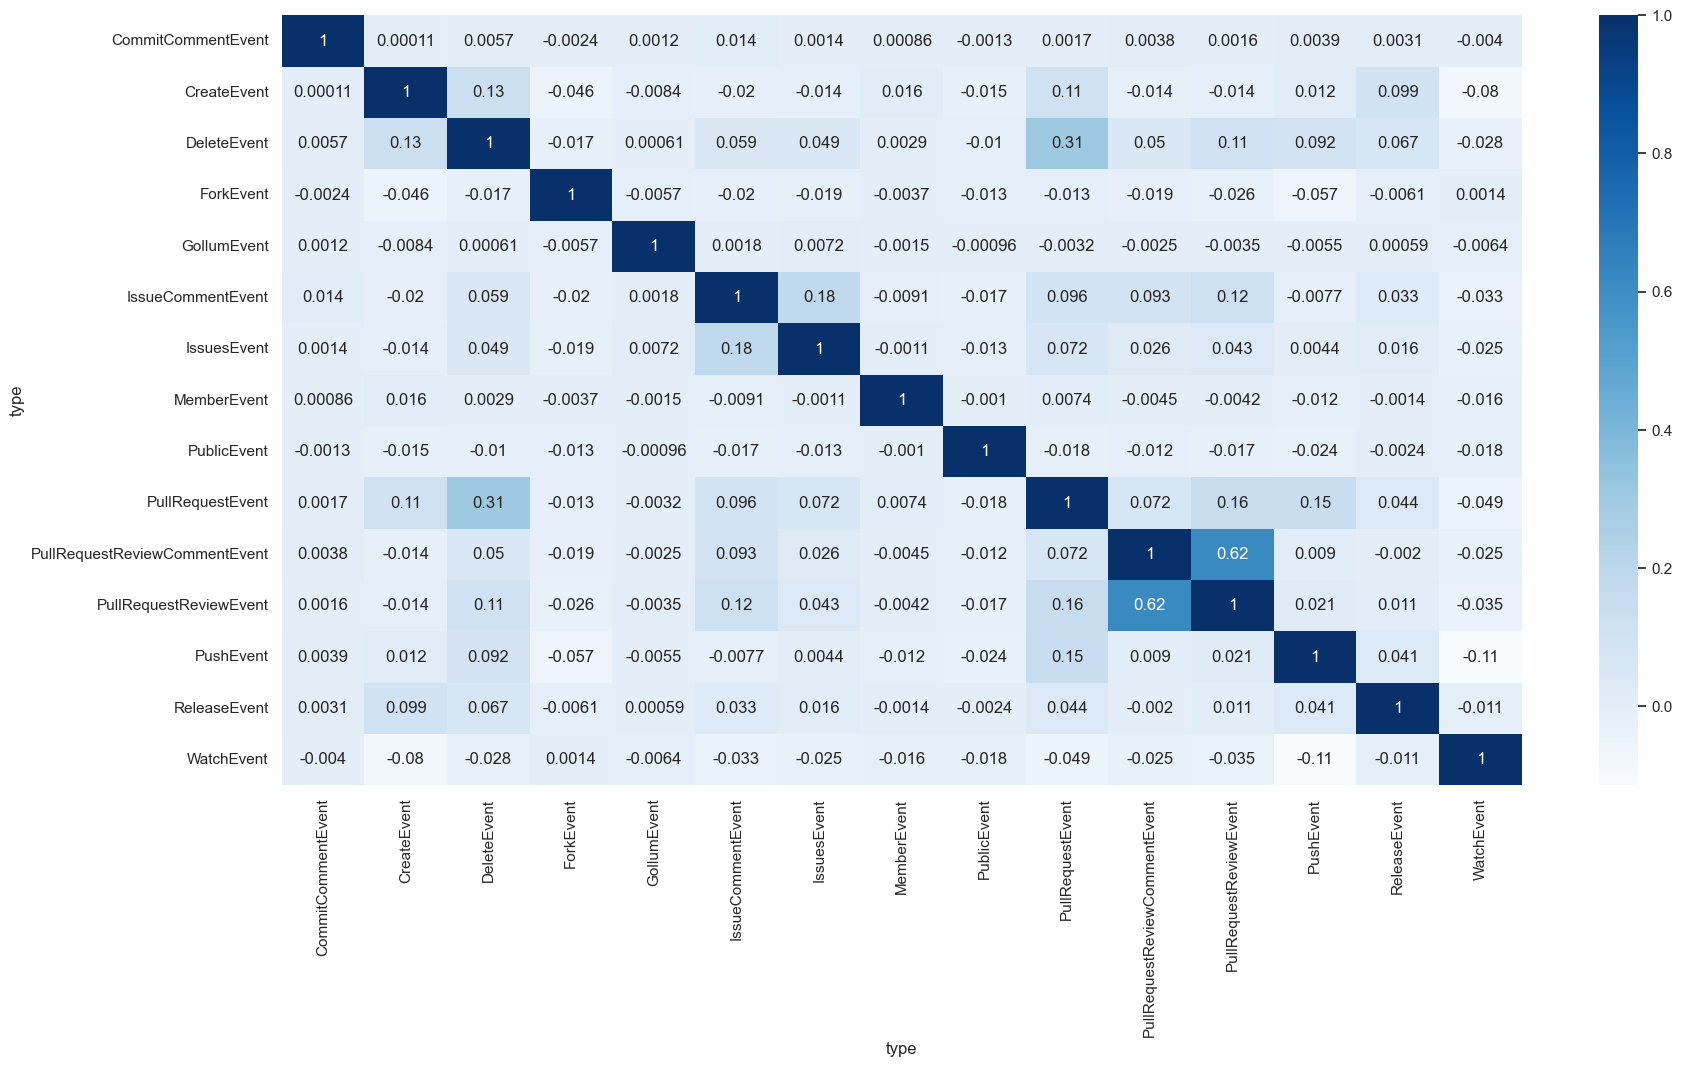

In [21]:
# Evaluate the hidden correlation to investigate probable 
cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [22]:
# Feature reduction to avoid multicollinearity
pivot_df = pivot_df[['CreateEvent',
                     'ForkEvent',
                     'IssuesEvent',
                     'PullRequestEvent',
                     'PullRequestReviewEvent',
                     'PushEvent',
                     'ReleaseEvent',
                     'WatchEvent']]

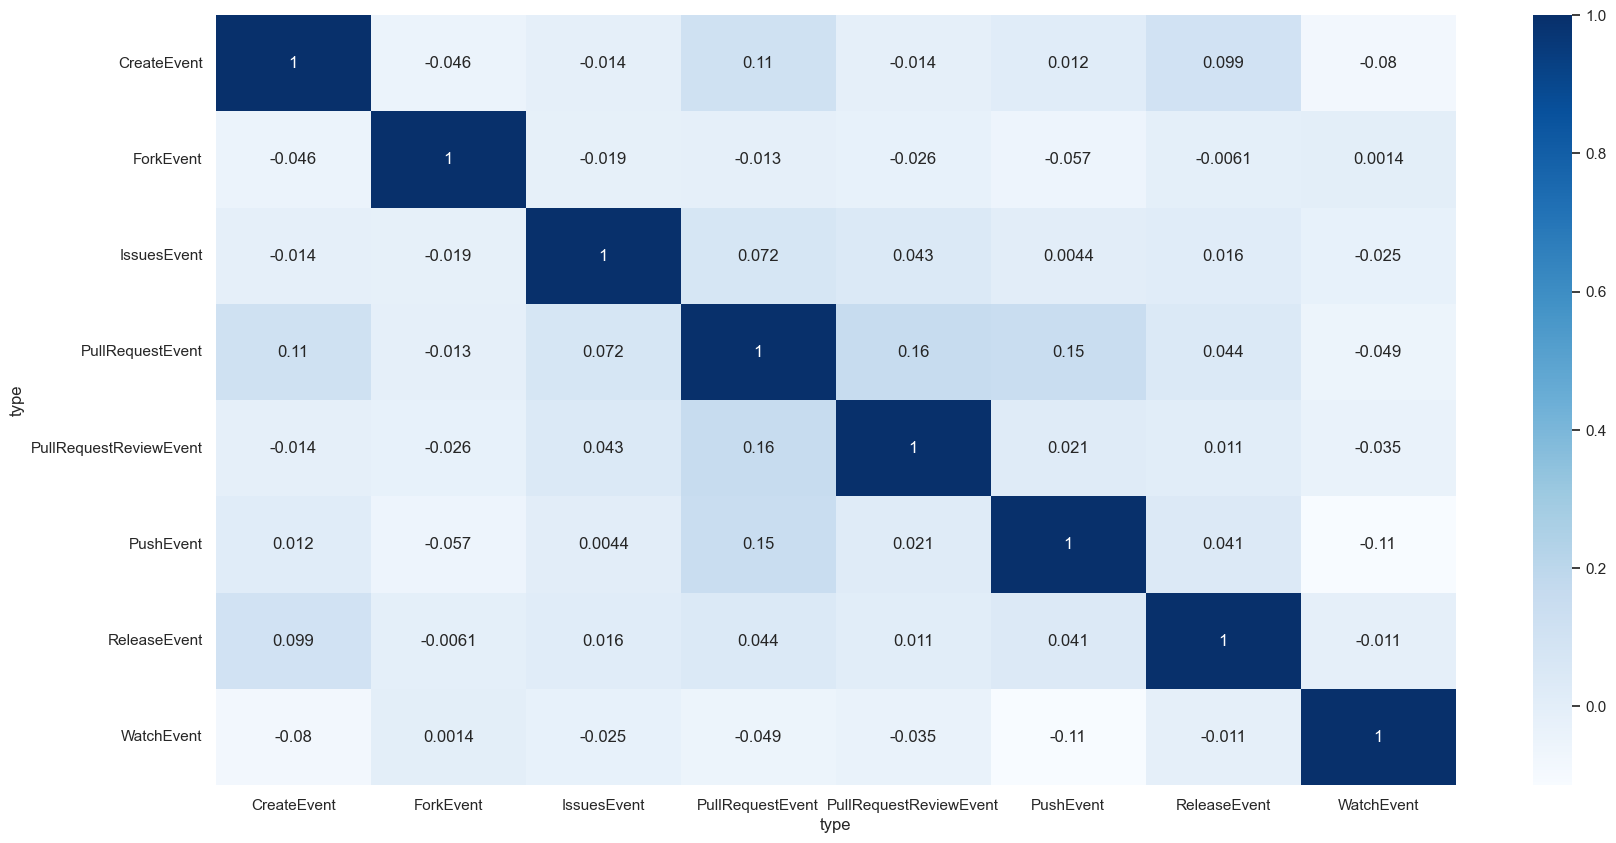

In [23]:
cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [24]:
pivot_df.to_csv('../data/processed/processed_ml.csv')